# Titer analysis for mutant viruses

RLU titering and p24 ELISAs for all viruses made for this study that grew well in initial titering. 

This includes the double mutant viruses that were not actually run in neuts. 

Most of these viruses were grown by Andrea Loes. The December viruses were grown by Amin Addetia and the WT virus for neuts (September) was grown by Kate Crawford.

Initial titering was done by whoever grew the virus. Kate Crawford did final titering and p24 ELISAs.

Each virus was titered or run in the p24 ELISA in duplicate. Values were averaged prior to plotting and a single point is shown for each virus. 

Raw data is in the January 22 and 25, 2021 excel files in the `./data` subdirectory. Those excel files include titer and p24 calculations.

In [5]:
import os

import pandas as pd
from plotnine import *

from IPython.display import display, SVG

In [25]:
CBP = ('#999999', '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7')
theme_set(theme_seaborn(style='white', context='paper', font_scale=2))

## Read in csv of cleaned titer and p24 data

In [20]:
df = pd.read_csv('./data/210125_p24_titers_calc.csv').set_index('VirusNumber', drop=True)
display(df)

,Sample,VirusDate,Used in neuts,p24 pg/mL,Avg RLU/mL,RLU/pg p24,Neut Dilution
VirusNumber,,,,,,,
1,WT,20-10-30,N,8.889640e+05,3.863343e+08,434.589353,NaN
2,P384L,20-10-30,Y,1.085360e+06,2.010502e+08,185.238184,NaN
3,F456K,20-10-30,Y,1.302027e+06,2.558643e+08,196.512275,10.0
4,E484Q,20-10-30,Y,1.022748e+06,6.294322e+07,61.543255,20.0
5,G485R,20-10-30,Y,7.605856e+05,2.607907e+08,342.881436,32.0
6,S494P,20-10-30,Y,1.051577e+06,1.122236e+08,106.719359,NaN
7,G446V_F456V,20-10-30,N,7.686937e+05,4.411057e+07,57.383810,NaN
8,G446V_F456V_E484P,20-10-30,Y,8.141892e+05,4.349809e+07,53.425034,NaN
9,WT,20-10-16,N,1.787613e+06,4.083852e+08,228.452858,NaN


In [30]:
df.drop(23, axis=0, inplace=True)

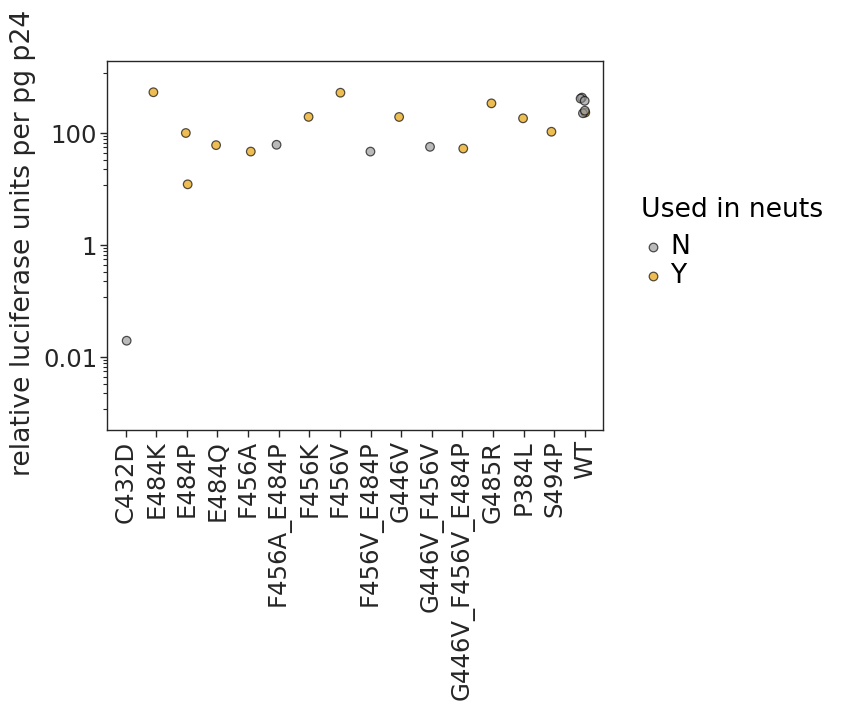

In [31]:
rlu_p24_all = (ggplot(df, aes(x='Sample', y='RLU/pg p24', fill='Used in neuts')) +
            geom_point(size=3, alpha=0.67, position=position_jitterdodge(jitter_width=0.2, jitter_height=0, dodge_width=0.2, random_state=51)) +
#             geom_crossbar(data=luc_titers.groupby('Spike', as_index=False).aggregate(Titer=pd.NamedAgg('Avg RLU per mL', 'mean')),
#                           mapping=aes(x='Spike', y='Titer', ymin='Titer', ymax='Titer'), color='black') +
            scale_fill_manual(values=CBP) +
            theme(axis_text_x=element_text(angle=90, vjust=1, hjust=0.5)) +
            scale_y_continuous(trans='log10', limits=[0.001, 1e3]) +
            ylab('relative luciferase units per pg p24') + 
            xlab('')
            )

_ = rlu_p24_all.draw()